# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Brandon Tatani - 931529

## <span style="color:blue">  Numerical exercises 5</span>

### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

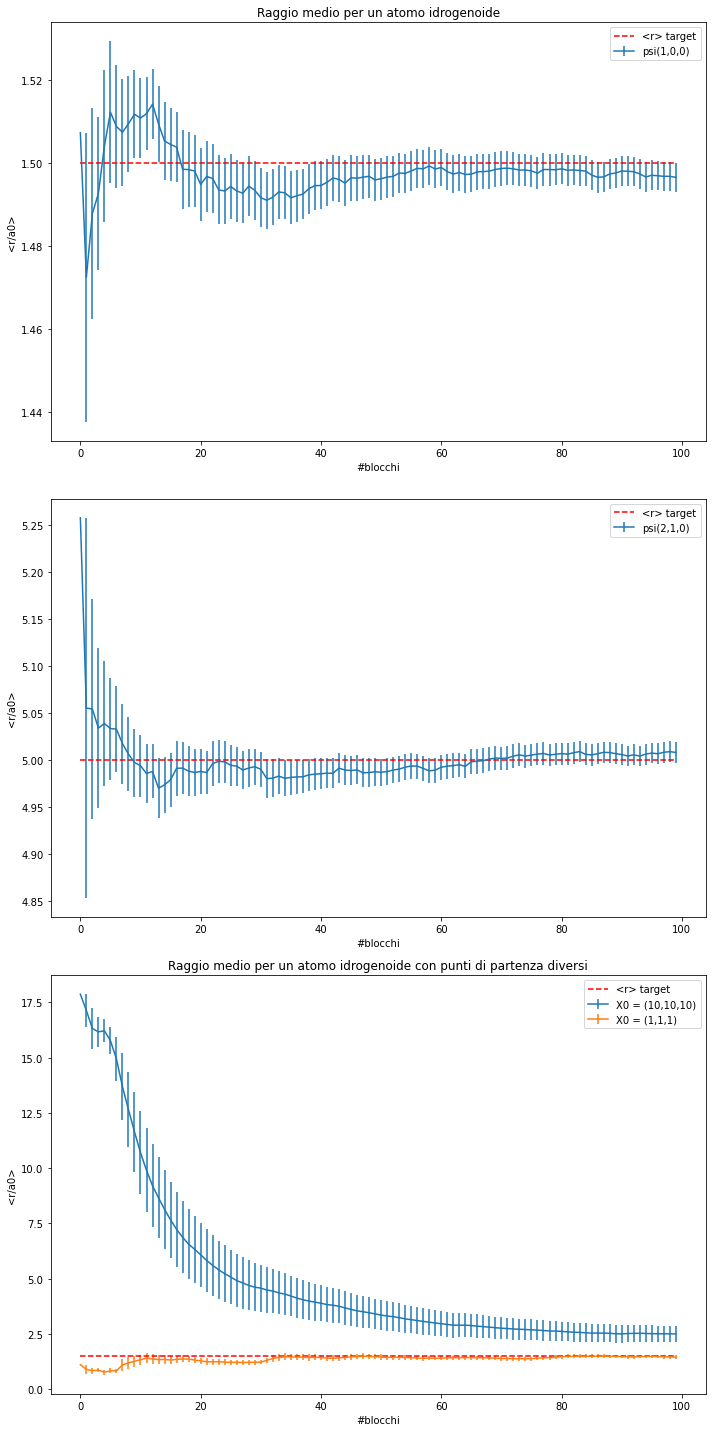

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#variabili
N = 100
x = np.arange(N)
target = np.ones(N)*1.5
target2 = np.ones(N)*5

#loading data

r1, err_r1 = np.loadtxt("output5_1.dat", usecols=(0,1), delimiter=' ', unpack='true')
r2, err_r2 = np.loadtxt("output5_2.dat", usecols=(0,1), delimiter=' ', unpack='true')
r1_far, err_far = np.loadtxt("output5_3.dat", usecols=(0,1), delimiter=' ', unpack='true')
r1_near, err_near = np.loadtxt("output5_4.dat", usecols=(0,1), delimiter=' ', unpack='true')


#plotting data
plt.figure(figsize=(10,20))
plt.subplots_adjust()

plt.subplot(311)
plt.errorbar(x, r1, yerr=err_r1, label='psi(1,0,0)')
plt.plot(x,target , 'r--', label='<r> target')
plt.title('Raggio medio per un atomo idrogenoide')
plt.xlabel('#blocchi')
#plt.ylim([0.8,2.4])
plt.ylabel('<r/a0>')
plt.legend()

plt.subplot(312)
plt.errorbar(x, r2, yerr=err_r2, label='psi(2,1,0)')
plt.plot(x,target2 , 'r--', label='<r> target')
#plt.title('Raggio medio per un atomo idrogenoide')
plt.xlabel('#blocchi')
#plt.ylim([0.8,2.4])
plt.ylabel('<r/a0>')
plt.legend()

plt.subplot(313)
plt.errorbar(x, r1_far, yerr=err_far, label='X0 = (10,10,10)')
plt.errorbar(x, r1_near, yerr=err_near, label='X0 = (1,1,1)')
plt.plot(x, target, 'r--', label='<r> target')
plt.title('Raggio medio per un atomo idrogenoide con punti di partenza diversi')
plt.xlabel('#blocchi')
#plt.ylim([0.8,2.4])
plt.ylabel('<r/a0>')
plt.legend()

plt.tight_layout()
plt.show()

Starting from a unreasonable point, far from the origin means the convergence to the desired region of space will happen in a longer number of steps. The above figure compares the same simulation starting from two very different points. As we can see the one who starts in a reasonable place will converge to the target in a few steps; whereas the one starting from very far away from the center will face an initial transient phase and eventualy will reach the same results.

#### Simulation using a multivariate normal transition probability $T(\vec{x}|\vec{y})$

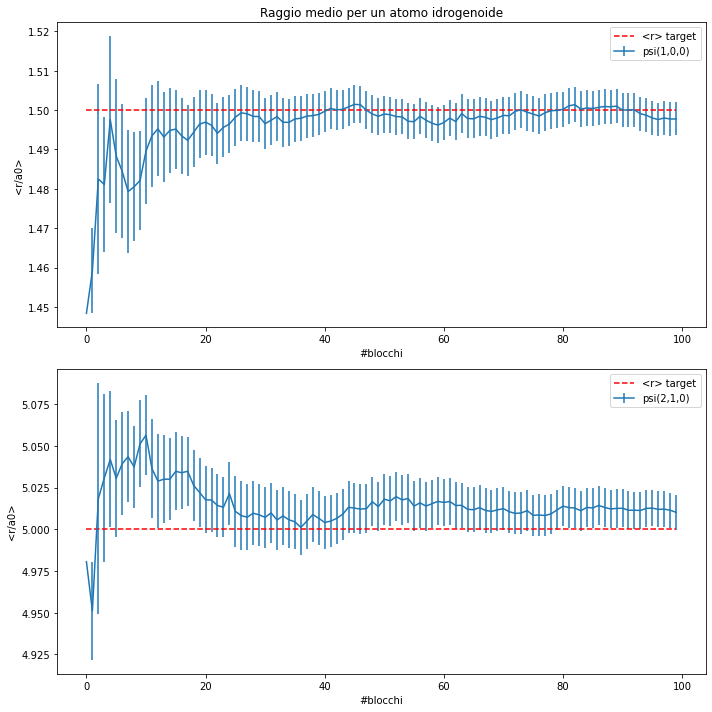

In [6]:
#loading data

r1, err_r1 = np.loadtxt("output5_5.dat", usecols=(0,1), delimiter=' ', unpack='true')
r2, err_r2 = np.loadtxt("output5_6.dat", usecols=(0,1), delimiter=' ', unpack='true')

#plotting data
plt.figure(figsize=(10,10))
plt.subplots_adjust()

plt.subplot(211)
plt.errorbar(x, r1, yerr=err_r1, label='psi(1,0,0)')
plt.plot(x,target , 'r--', label='<r> target')
plt.title('Raggio medio per un atomo idrogenoide')
plt.xlabel('#blocchi')
#plt.ylim([0.8,2.4])
plt.ylabel('<r/a0>')
plt.legend()

plt.subplot(212)
plt.errorbar(x, r2, yerr=err_r2, label='psi(2,1,0)')
plt.plot(x,target2 , 'r--', label='<r> target')
#plt.title('Raggio medio per un atomo idrogenoide')
plt.xlabel('#blocchi')
#plt.ylim([0.8,2.4])
plt.ylabel('<r/a0>')
plt.legend()

plt.tight_layout()
plt.show()

<span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

The answer is obvious: it won't change the results. This can be explained by looking at the Acceptance probability of the Metropolis: $A(x|y) = min\left[1, \frac{T(y|x)p(x)}{T(x|y)p(y)}\right]$. If the transition probability is simmetrical then $T(y|x) = T(x|y)$, wich means that $A(x|y)$ doesn't depend on the transition matrix.